In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data_folder='Desktop/CREM/Raw Data/OFS'
os.listdir(raw_data_folder)

['.DS_Store',
 'energy_consumption_by_consumers.xls',
 'final_energy_consumption.xls',
 'electricity_production.xls',
 'new_renewables_energy_production.xls',
 'renewables_energy_consumption.xls',
 'compte_énergie_ménages_economie.xls',
 'utilization_rate_nuclear_centrals.xls',
 'Démographie par canton.xlsx',
 'Données démographie suisse.xlsx',
 'energy_importation.xls']

In [3]:
def changeinzero(x):
    if type(x) is str:
        return 0
    else:
        return x

In [27]:
ei=pd.read_excel(os.path.join(raw_data_folder,'energy_importation.xls'),skiprows=11,skip_footer=10)
ei.drop(ei.columns[[2,3,5,6,8,9,13,14,15]], axis=1, inplace=True)
ei.columns=['Année','Importation de bois et charbon de bois (TJ)','Importation de pétrole et dérivés (1000t)','Importation de charbon (1000t)','Importation de gaz (TJ)','Importation de biocarburants (TJ)',"Importation d'éléctricité (GWh)"]
ei.set_index('Année', inplace=True) #inplace=true évite l'opération ei = ei ....
ei['Importation de bois et charbon de bois (TJ)'] = ei['Importation de bois et charbon de bois (TJ)'].map(changeinzero)
ei['Importation de biocarburants (TJ)'] = ei['Importation de biocarburants (TJ)'].map(changeinzero)
ei["Importation d'éléctricité (TJ)"]=3.6*ei["Importation d'éléctricité (GWh)"]
ei.drop(["Importation d'éléctricité (GWh)"],axis=1,inplace=True)
ei.head()

,Importation de bois et charbon de bois (TJ),Importation de pétrole et dérivés (1000t),Importation de charbon (1000t),Importation de gaz (TJ),Importation de biocarburants (TJ),Importation d'éléctricité (TJ)
Année,,,,,,
1970,0,13359,827,1540,0,12938.4
1971,0,13588,565,3720,0,24742.8
1972,0,13946,389,4720,0,28249.2
1973,220,14900,370,6390,0,25264.8
1974,0,13922,535,13460,0,22586.4


In [23]:
data_folder='Desktop/CREM/Data'
ei.to_csv(os.path.join(data_folder,"energy_importation_v1"))

<IPython.core.display.Javascript object>


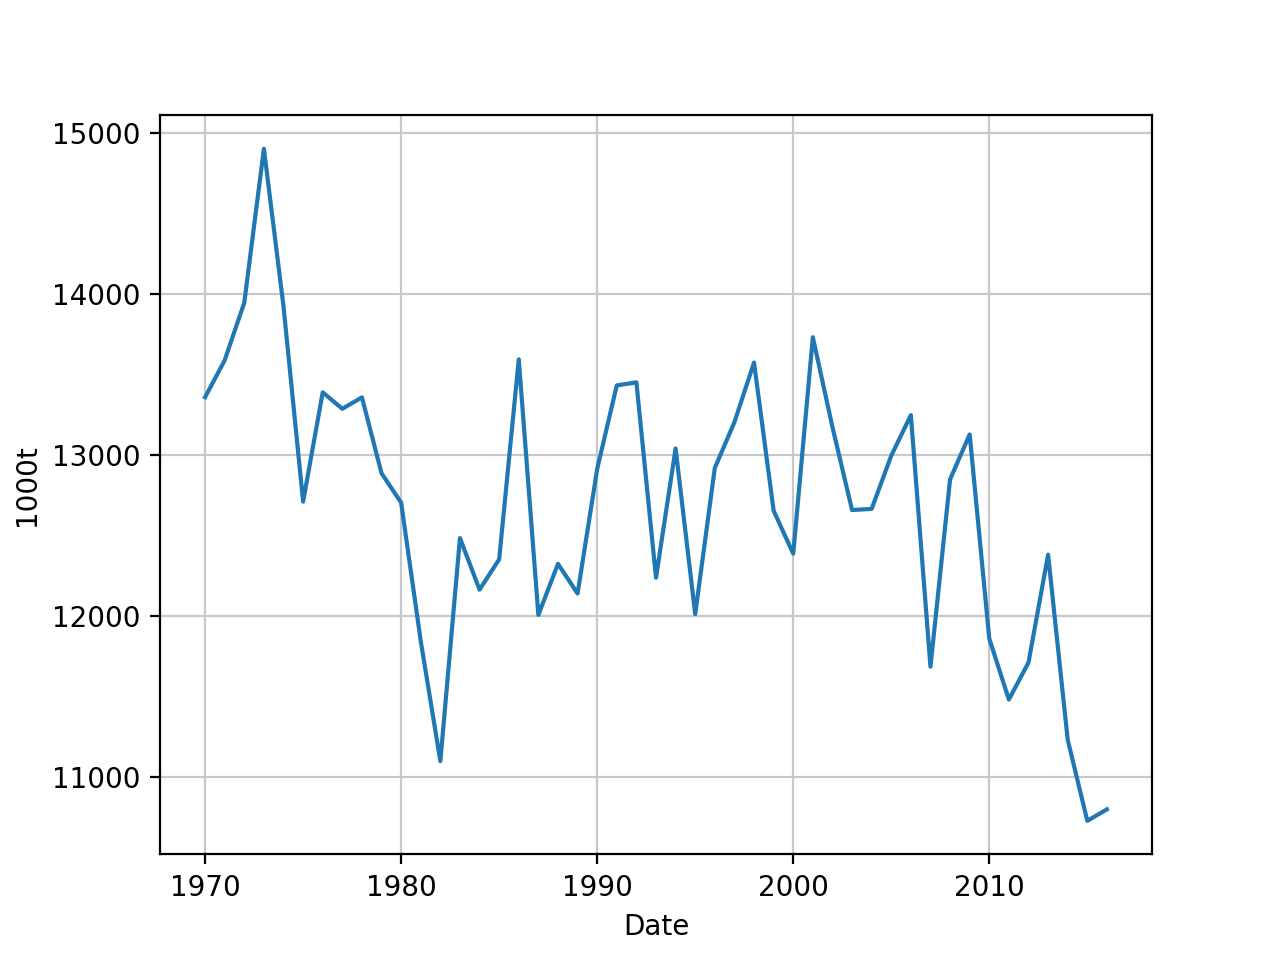

In [24]:
%matplotlib notebook
plt.figure('Importation de pétrole')
plt.plot(ei.index,ei['Importation de pétrole et dérivés (1000t)'])
plt.xlabel('Date')
plt.ylabel('1000t')
plt.grid(color='xkcd:silver')

In [25]:
coef_petrole=23.45
coef_charbon=28.10
ei2=ei
ei2["Importation de pétrole et dérivés (1000t)"] *= coef_petrole
ei2["Importation de charbon (1000t)"] *= coef_charbon
ei2.rename(columns={'Importation de pétrole et dérivés (1000t)': 'Importation de pétrole et dérivés (TJ)'}, inplace=True)
ei2.rename(columns={'Importation de charbon (1000t)': 'Importation de charbon (TJ)'}, inplace=True)
ei2.to_csv(os.path.join(data_folder,"energy_importation_v2"))

<IPython.core.display.Javascript object>


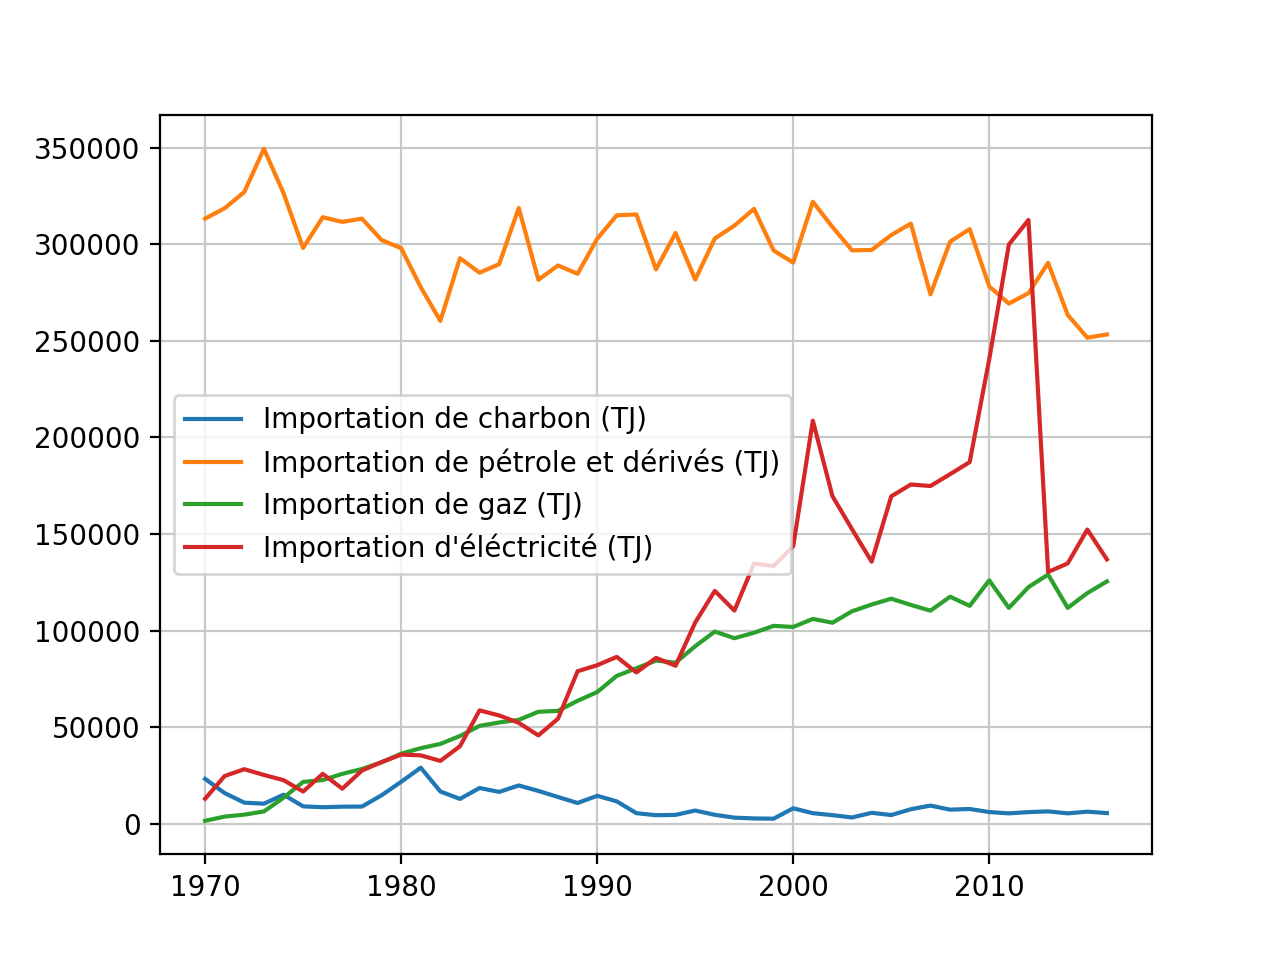

In [26]:
plt.figure('Comparaison des importations')
plt.plot(ei2.index,ei2['Importation de charbon (TJ)'])
plt.plot(ei2.index,ei2['Importation de pétrole et dérivés (TJ)'])
plt.plot(ei2.index,ei2['Importation de gaz (TJ)'])
plt.plot(ei2.index,ei2["Importation d'éléctricité (TJ)"])
plt.legend()
plt.grid(color='xkcd:silver')